## Project Description 
The dataset describes the chemical properties of glass and involves classifying samples of glass using their chemical properties as one of six classes. The dataset was credited to Vina Spiehler in 1987. The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence...if it is correctly identified!
The chemical compositions are measured as the weight percent in corresponding oxide.

#### Attribute Information
- 1 -  Id number: 1 to 214
- 2 -  RI: refractive index
- 3 -  Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
- 4 -  Mg: Magnesium
- 5 -  Al: Aluminum
- 6 -  Si: Silicon
- 7 -  K: Potassium
- 8 -  Ca: Calcium
- 9 -  Ba: Barium
- 10 - Fe: Iron
- 11 - Type of glass: (class attribute)
    - a. building_windows_float_processed
    - b. building_windows_non_float_processed
    - c. vehicle_windows_float_processed
    - d. vehicle_windows_non_float_processed (none in this database)
    - e. containers
    - f. tableware
    - g. headlamps

There are 214 observations in the dataset. The dataset can be divided into window glass (classes 1-4) and non-window glass (classes 5-7). 
###### Predict : Type of glass. 



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'C:\Users\Admin\OneDrive\Desktop\Flip lobo\Assignment_06DEC23\glass.csv')
df

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


### Observations:
- Can observe 213 rows and 11 columns, due to excluding first row of the dataset (as no column header was given).
- Having no column headers, so need to add respective column headers

In [3]:
## Assigning column names to dataset.
column_names = ['Id number', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type of glass']
df = pd.read_csv(r'C:\Users\Admin\OneDrive\Desktop\Flip lobo\Assignment_06DEC23\glass.csv', header=None, names=column_names)

In [4]:
df.head()

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [5]:
df.shape

(214, 11)

### Observations:
- Headers can mapped with their respective dataset.
- Final shape includes 214 rows and 11 columns

In [6]:
df.dtypes

Id number          int64
RI               float64
Na               float64
Mg               float64
Al               float64
Si               float64
K                float64
Ca               float64
Ba               float64
Fe               float64
Type of glass      int64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id number      214 non-null    int64  
 1   RI             214 non-null    float64
 2   Na             214 non-null    float64
 3   Mg             214 non-null    float64
 4   Al             214 non-null    float64
 5   Si             214 non-null    float64
 6   K              214 non-null    float64
 7   Ca             214 non-null    float64
 8   Ba             214 non-null    float64
 9   Fe             214 non-null    float64
 10  Type of glass  214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


- No null values found

In [8]:
df.describe()

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


### Observations
- No null values found
- Can see right skewed in following columns (Na, Al, Ca, Ba, Fe, and Type of glass), out of which Type of glass is target variable.
- Can see left skewed in following features (Mg, Si and K)  
- There are some high standard deviation for some of the columns like (Id number and Type of Glass). However, Id number is seems to be unique ID and can be dropped out and Type of Glass is the target variable.

In [9]:
df.isnull().sum()

Id number        0
RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of glass    0
dtype: int64

## Observations:
- Confirmed no null values in any of the columns.

In [10]:
## Check unique values in all columns with non-graphical methods
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

1      1
135    1
137    1
138    1
139    1
      ..
75     1
76     1
77     1
78     1
214    1
Name: Id number, Length: 214, dtype: int64


1.52152    3
1.51590    3
1.51645    3
1.51754    2
1.51841    2
          ..
1.51625    1
1.51569    1
1.51605    1
1.51588    1
1.51651    1
Name: RI, Length: 178, dtype: int64


13.02    5
13.21    5
13.00    5
13.64    4
13.33    4
        ..
13.34    1
13.31    1
14.17    1
13.51    1
14.23    1
Name: Na, Length: 142, dtype: int64


0.00    42
3.48     8
3.58     8
3.54     8
3.52     7
        ..
2.76     1
3.15     1
2.90     1
3.83     1
1.78     1
Name: Mg, Length: 94, dtype: int64


1.54    8
1.19    6
1.43    5
1.29    5
1.23    5
       ..
1.08    1
1.64    1
1.61    1
1.07    1
1.94    1
Name: Al, Length: 118, dtype: int64


72.86    4
72.99    4
73.10    4
73.28    4
73.11    4
        ..
73.55    1
72.34    1
72.26    1
73.26    1
73.61    1
Name: Si, Length: 133, dtype: int64


0.00    30
0.57    12
0.56    11
0.60    11
0.58   

## Observations:
- ID number is unique value for each row and can be dropped.
- Rest all are continuous dataset and distributed, which we can check with graphical plot.
- Except Type of glass, as same is target variable and distributed in six categories (multiclassification). However, same can be mapped into binary classification as mentioned in problem.

In [11]:
## Checking the unique values in each column
df.nunique().to_frame('Number of unique values')

,Number of unique values
Id number,214
RI,178
Na,142
Mg,94
Al,118
Si,133
K,65
Ca,143
Ba,34
Fe,32


### Observation:
- Its confirmed Id number column contains 214 unique values which is aligned with total number of rows. Hence, same can be dropped.

In [12]:
## Drop column (Id number)
df = df.drop('Id number', axis=1)
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


- after removing ID number column, our data shape is 214 rows and 10 columns

In [13]:
## Check duplicate value
df1 = df[df.duplicated()]
df1

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


- Duplicate row found which needs to removed

In [14]:
df.drop_duplicates(inplace=True)
df.shape

(213, 10)

- After removing 1 duplicate row, shape as 213 rows and 10 columns

In [15]:
## recheck again the duplicate
df1 = df[df.duplicated()]
df1

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass


- No duplicate row noticed.

In [16]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


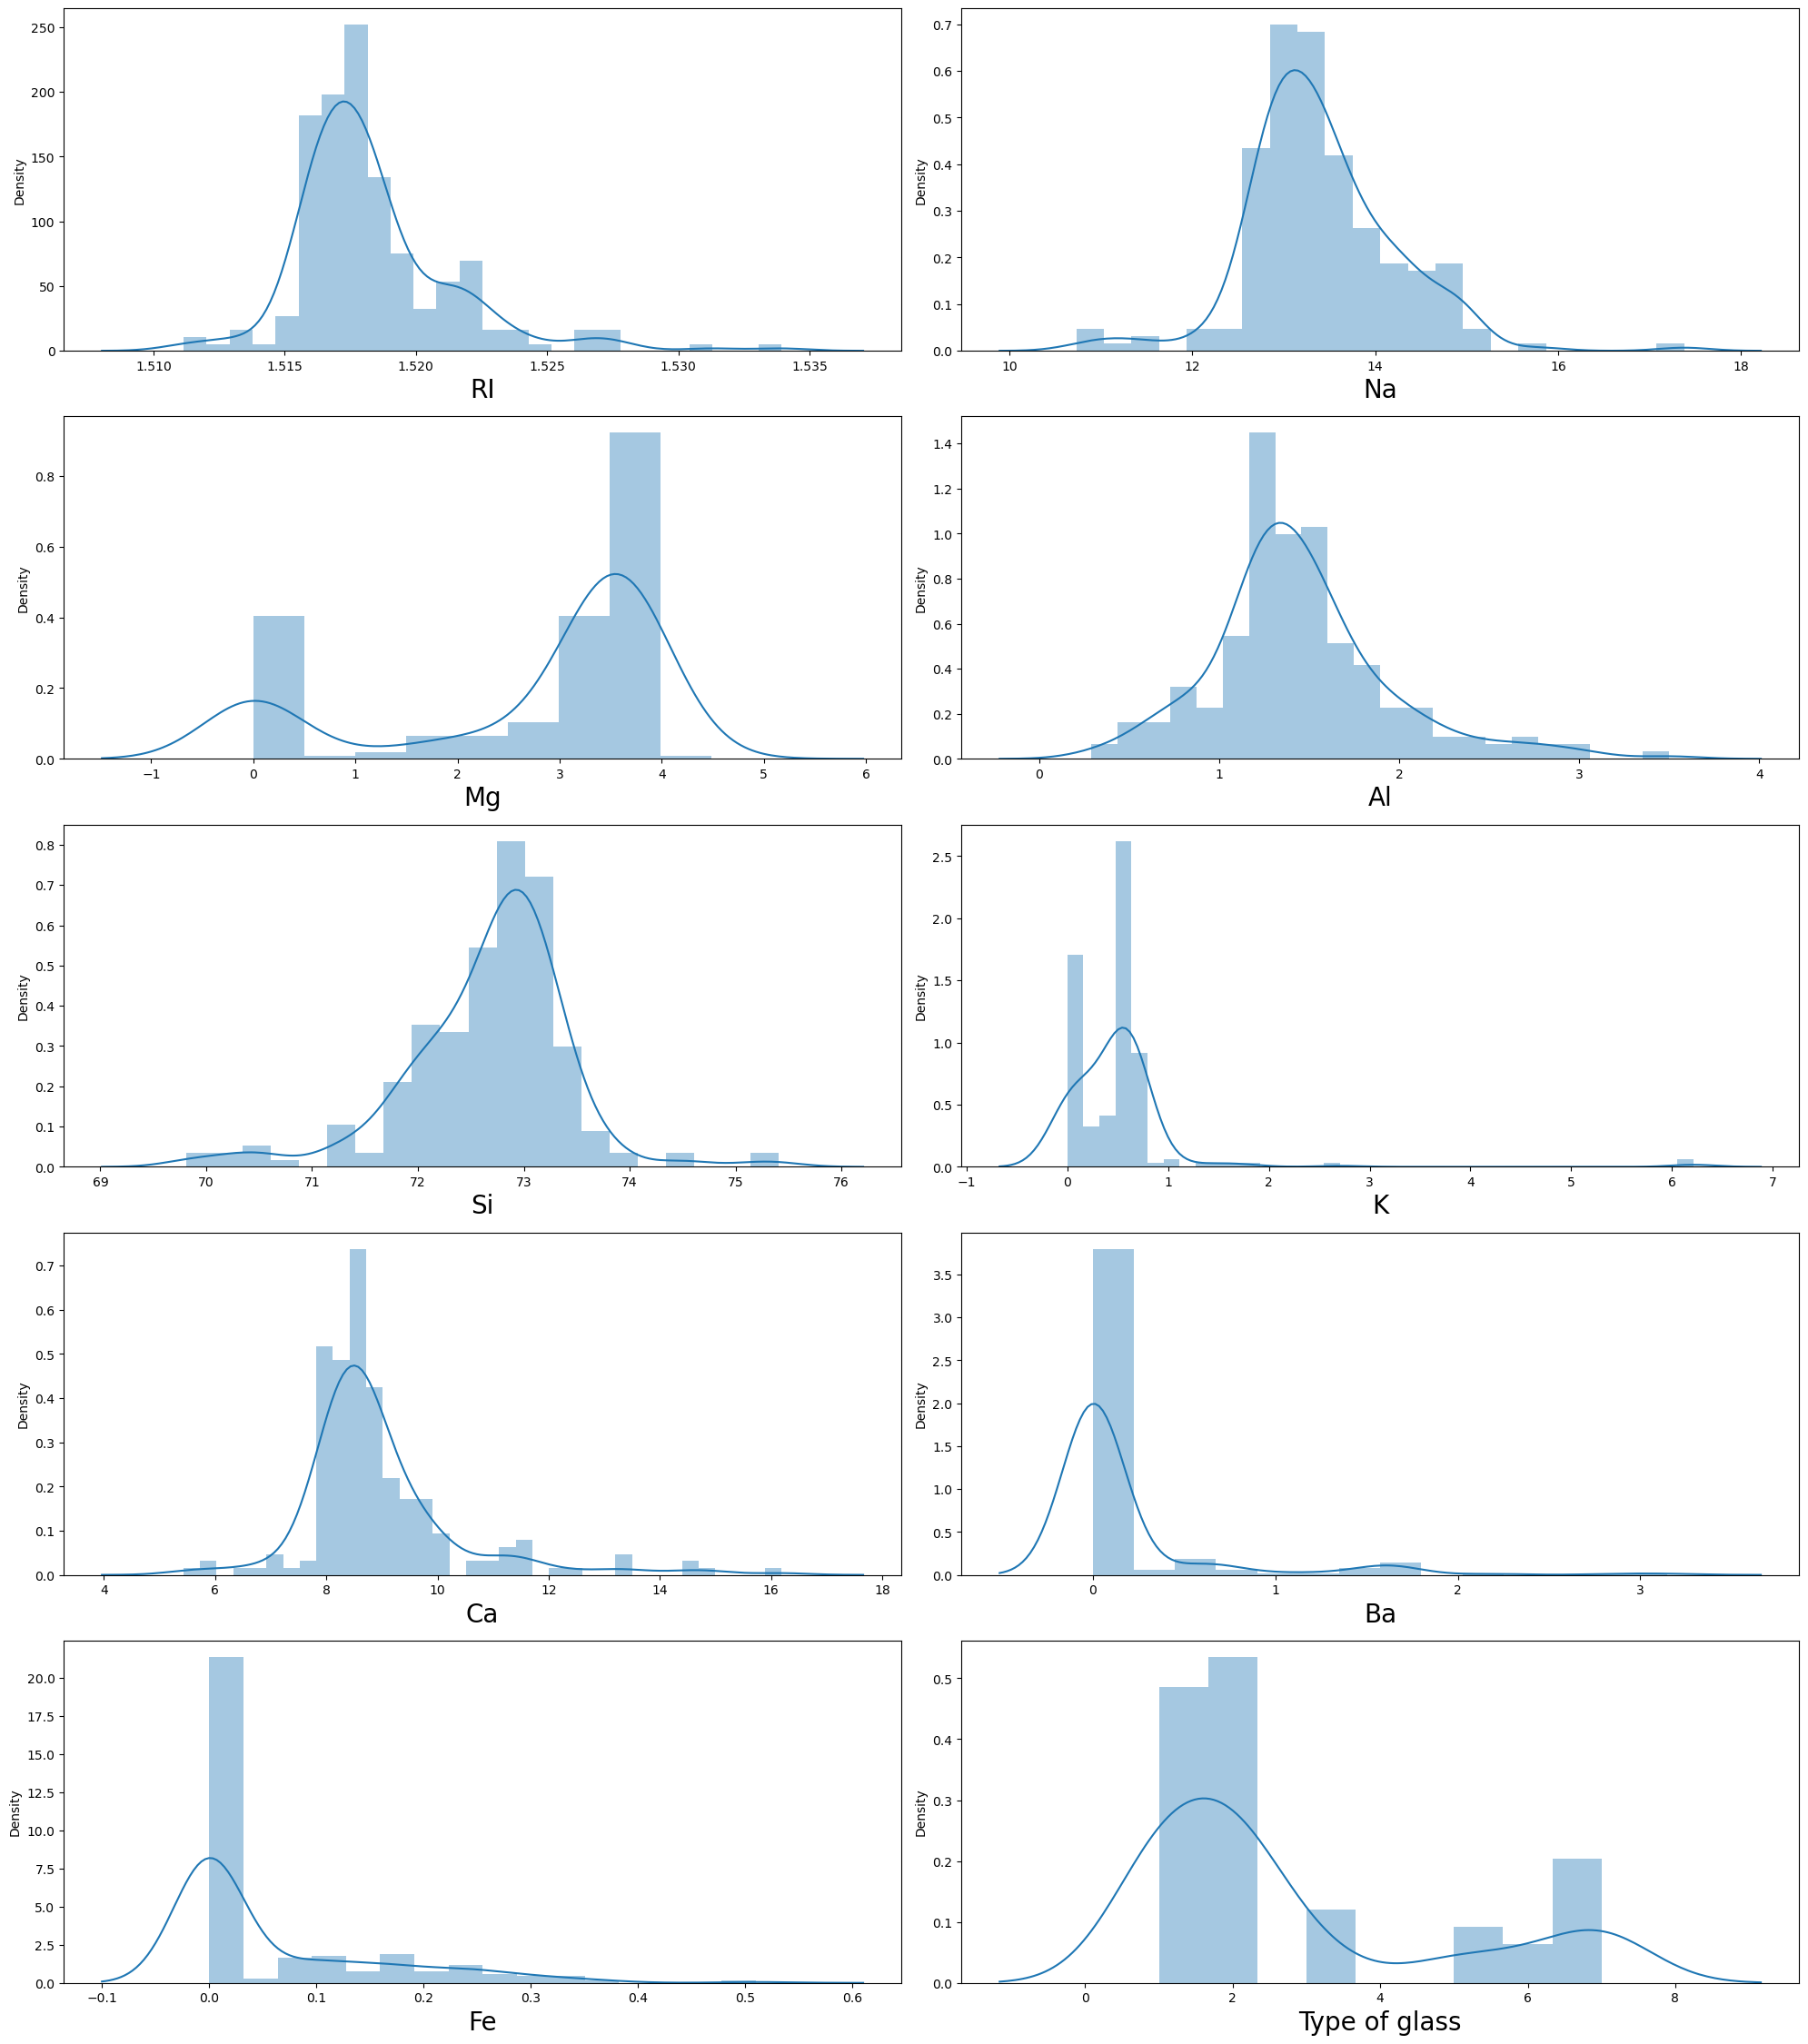

In [17]:
## Check distribution of data in all columns
plotnumber = 1
plt.figure(figsize = (20, 40))
for i in df.columns:
    if plotnumber <=11:
        plt.subplot(9, 2, plotnumber)
        sns.distplot(df[i])
        plt.xlabel(i, fontsize = 20)
    plotnumber+=1  
plt.tight_layout()        

### Observation:
- Right skewdness in following columns (RI, Na, Al, Si, K, Ca, Ba and Fe)
- Negative skewdness in following columns (Mg and Si)
- Let's check theortically as well.

In [18]:
df.skew()

RI               1.648017
Na               0.465699
Mg              -1.146096
Al               0.938402
Si              -0.744646
K                6.545429
Ca               2.050752
Ba               3.406749
Fe               1.747173
Type of glass    1.108861
dtype: float64

### Observations: It's confirmed
- Right skewdness in following columns (RI, Al, Si, K, Ca, Ba, Fe, and Type of glass). Out of which Type of glass is the target variable.
- Negative skewdness in following columns (Mg and Si)
- Will rectify skewness problem later

2    76
1    69
7    29
3    17
5    13
6     9
Name: Type of glass, dtype: int64


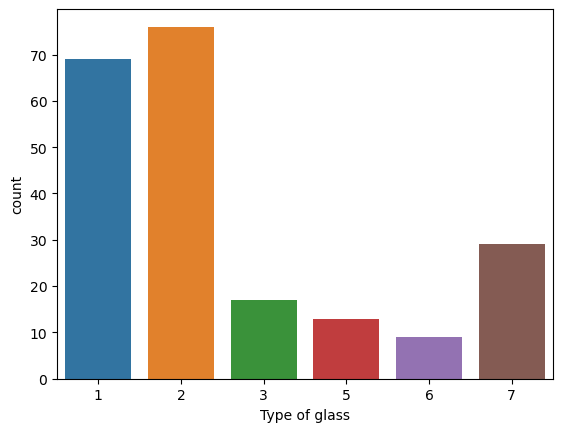

In [19]:
### Check distribution of data in target variable
sns.countplot(x='Type of glass', data=df)
print(df['Type of glass'].value_counts())

### Observation:
- Data Distribution of Type of glass is not uniform, will deal later.
- Also, its confirmed that there is no data available for 'Class 4' Type of glass. However, category 1 and 2 having more data.
- This is called as Multiclassification
- However, as per problem statement will narrow down to two categories and our target variable will be Binary Classification.

### Lets divide Type of glass dataset into two categories
- window glass (classes 1-4)
- non-window glass (classes 5-7)

In [20]:
# Define the binary target variable based on cutoff
# 0 means window glass and 1 mean non-window glass
df['Category of glass'] = df['Type of glass'].apply(lambda x: 0 if x <= 4 else 1)
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass,Category of glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1,0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1,0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1,0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1,0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7,1
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7,1
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7,1
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7,1


- New column as "Catgeory of glass" added which narrow down type of glass from 1 to 7 (Multiclassification) to 1 to 2 (Binary classification)

0    162
1     51
Name: Category of glass, dtype: int64


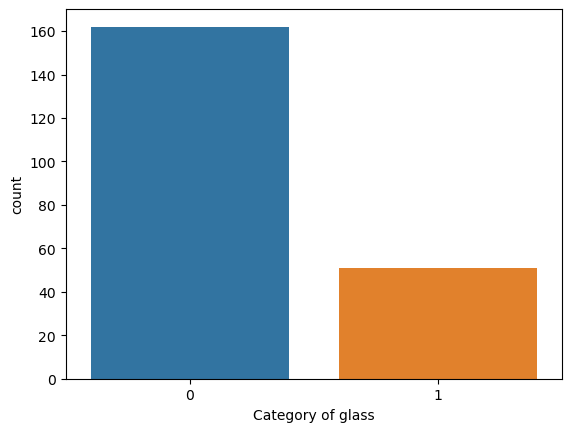

In [21]:
### Check distribution of data in new target variable (Category of glass)
sns.countplot(x='Category of glass', data=df)
print(df['Category of glass'].value_counts())

- It shows imbalance in data betweeen 0 and 1 catgeories, will deal later with oversampling (as we have less data)

- As multiclassification ('Type of glass') might be require more complex model to distinguish between multiple classes effectively
- However, binary classification ('Category of glass') might be handled more efficiently by simpler models, so we can check for droping "Type of glass" from dataset
- Lets check some of the EDA separately for Type of Glass and Category of glass

In [22]:
## Bivariate analysis between all features v/s target variable ('Type of glass')
x = df.drop(['Type of glass', 'Category of glass'], axis=1)
y = df['Type of glass']

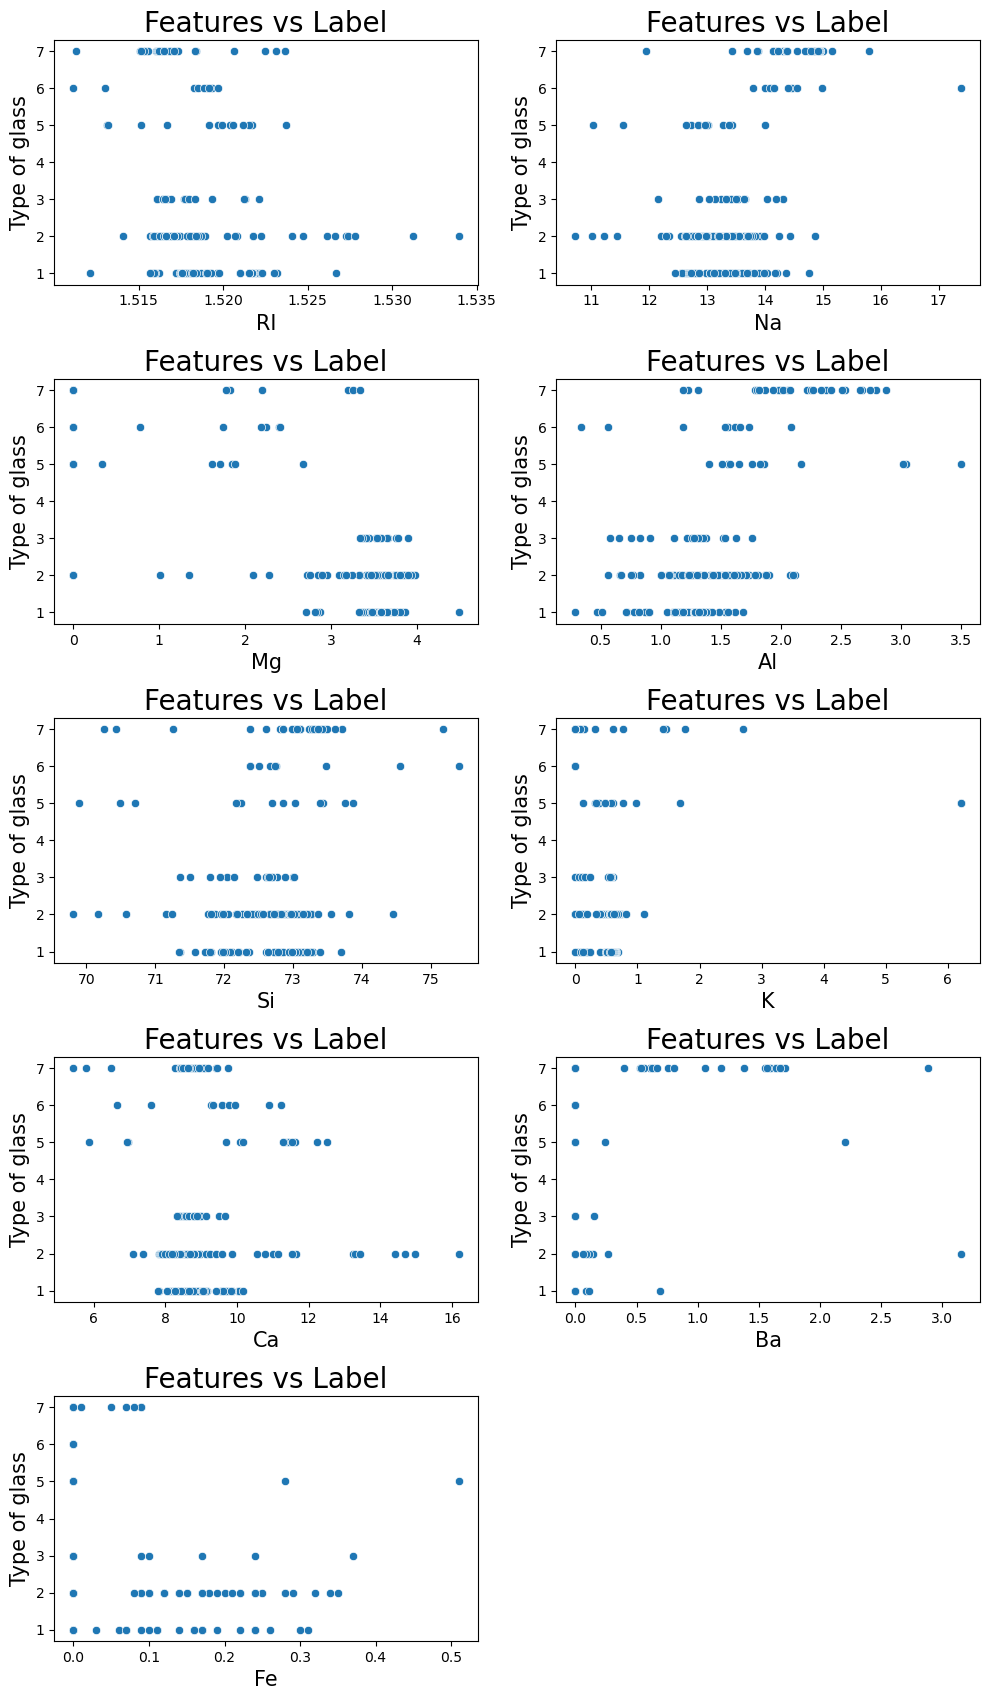

In [23]:
plotnumber = 1
plt.figure(figsize = (10, 20))
for i in x.columns:
    if plotnumber <=12:
        plt.subplot(6, 2, plotnumber)
        sns.scatterplot(x=i, y=y, data=df)
        plt.xlabel(i, fontsize = 15)
        plt.ylabel('Type of glass', fontsize = 15)
        plt.title('Features vs Label', fontsize = 20)
    plotnumber+=1 
plt.tight_layout() 

- No strong relation seen between features and label

In [24]:
## Bivariate analysis between all features v/s target variable ('Category of glass')
x1 = df.drop(['Type of glass', 'Category of glass'], axis=1)
y1 = df['Category of glass']

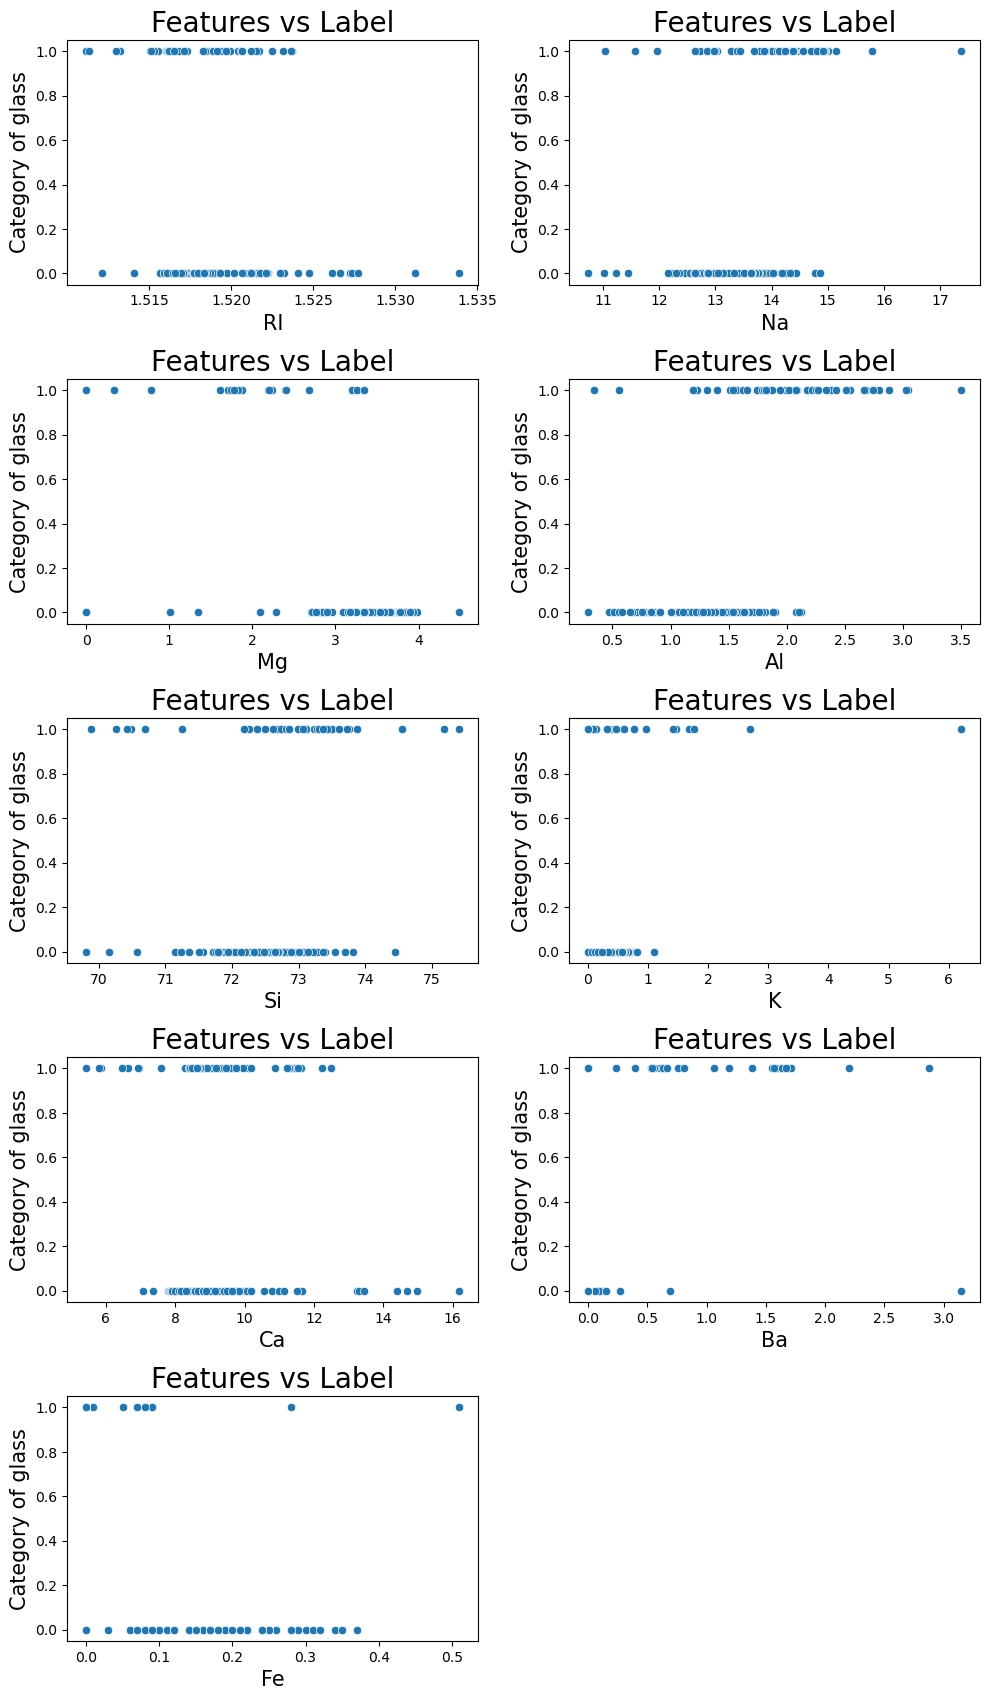

In [25]:
plotnumber = 1
plt.figure(figsize = (10, 20))
for i in x1.columns:
    if plotnumber <=12:
        plt.subplot(6, 2, plotnumber)
        sns.scatterplot(x=i, y=y1, data=df)
        plt.xlabel(i, fontsize = 15)
        plt.ylabel('Category of glass', fontsize = 15)
        plt.title('Features vs Label', fontsize = 20)        
    plotnumber+=1 
plt.tight_layout() 

- No strong correlation between features and target variable

<Figure size 500x1000 with 0 Axes>

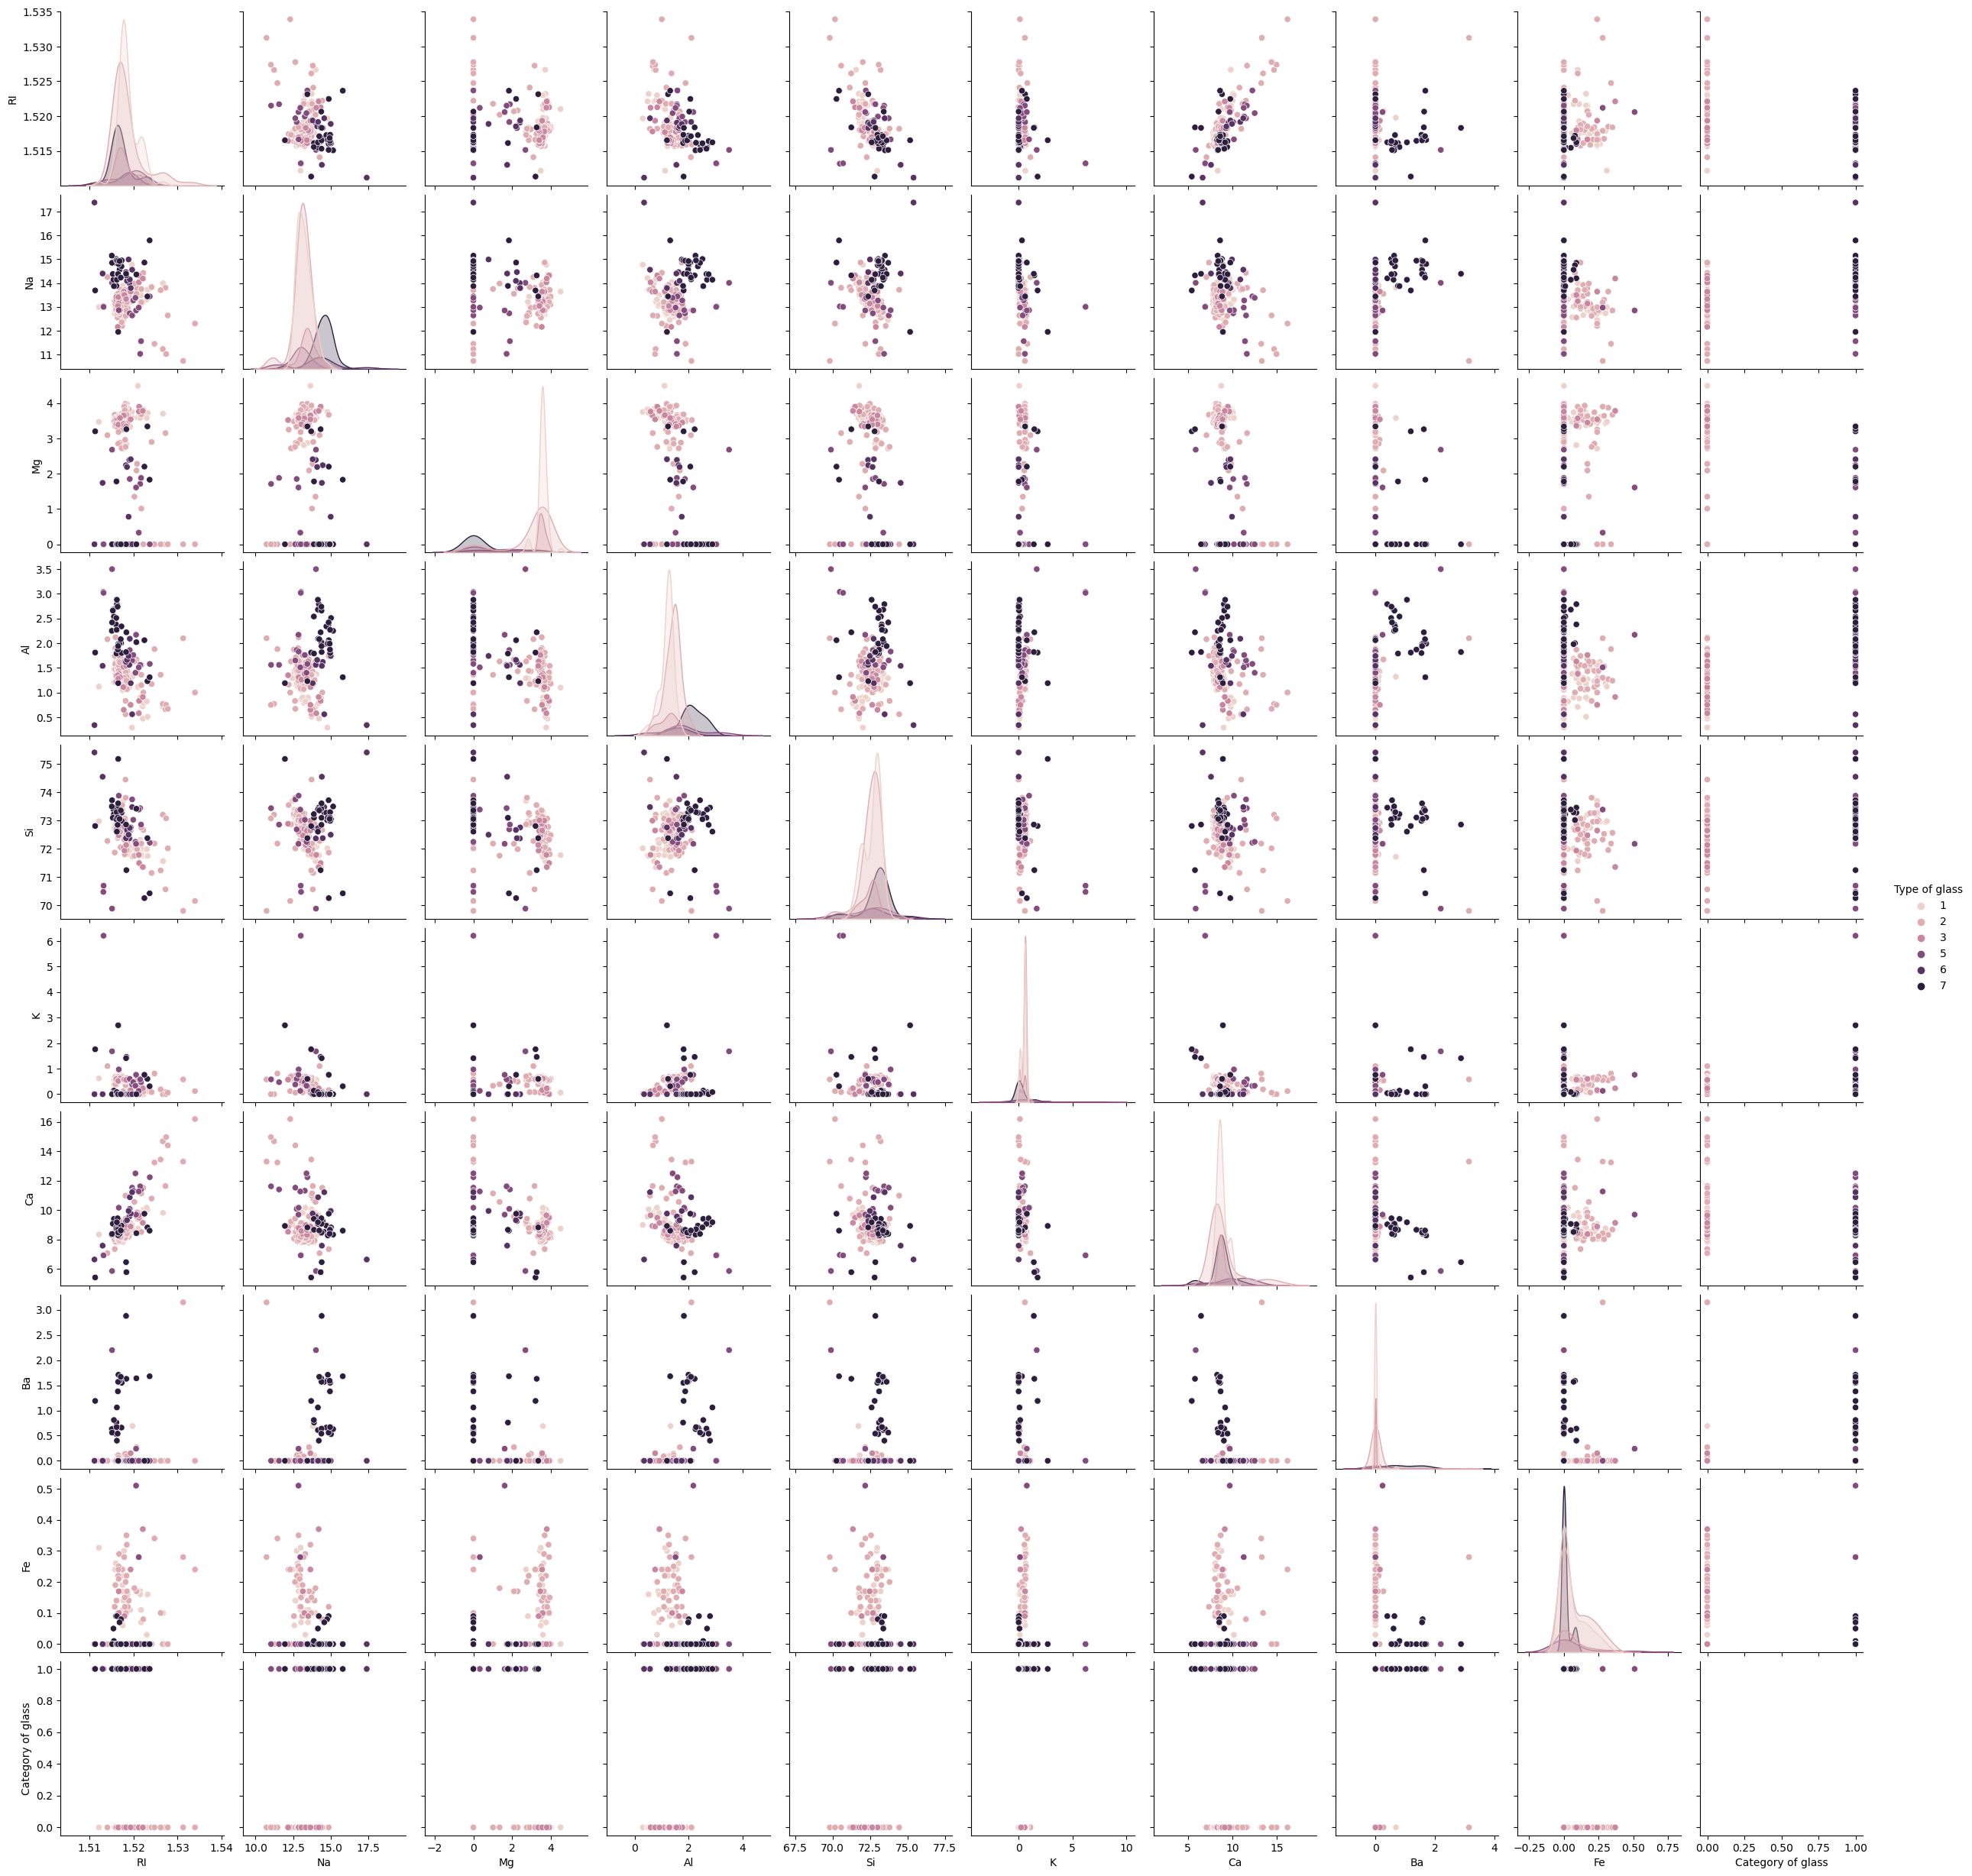

In [26]:
## Multivariate plot analysis
plt.figure(figsize = (5,10))
sns.pairplot(data=df, hue='Type of glass')

### Observations
- Can see multicoorelation between features, however due to having 11 columns visualization is not that good.
- Will check with heatmap
- No relation between target variable and features

<Figure size 500x1000 with 0 Axes>

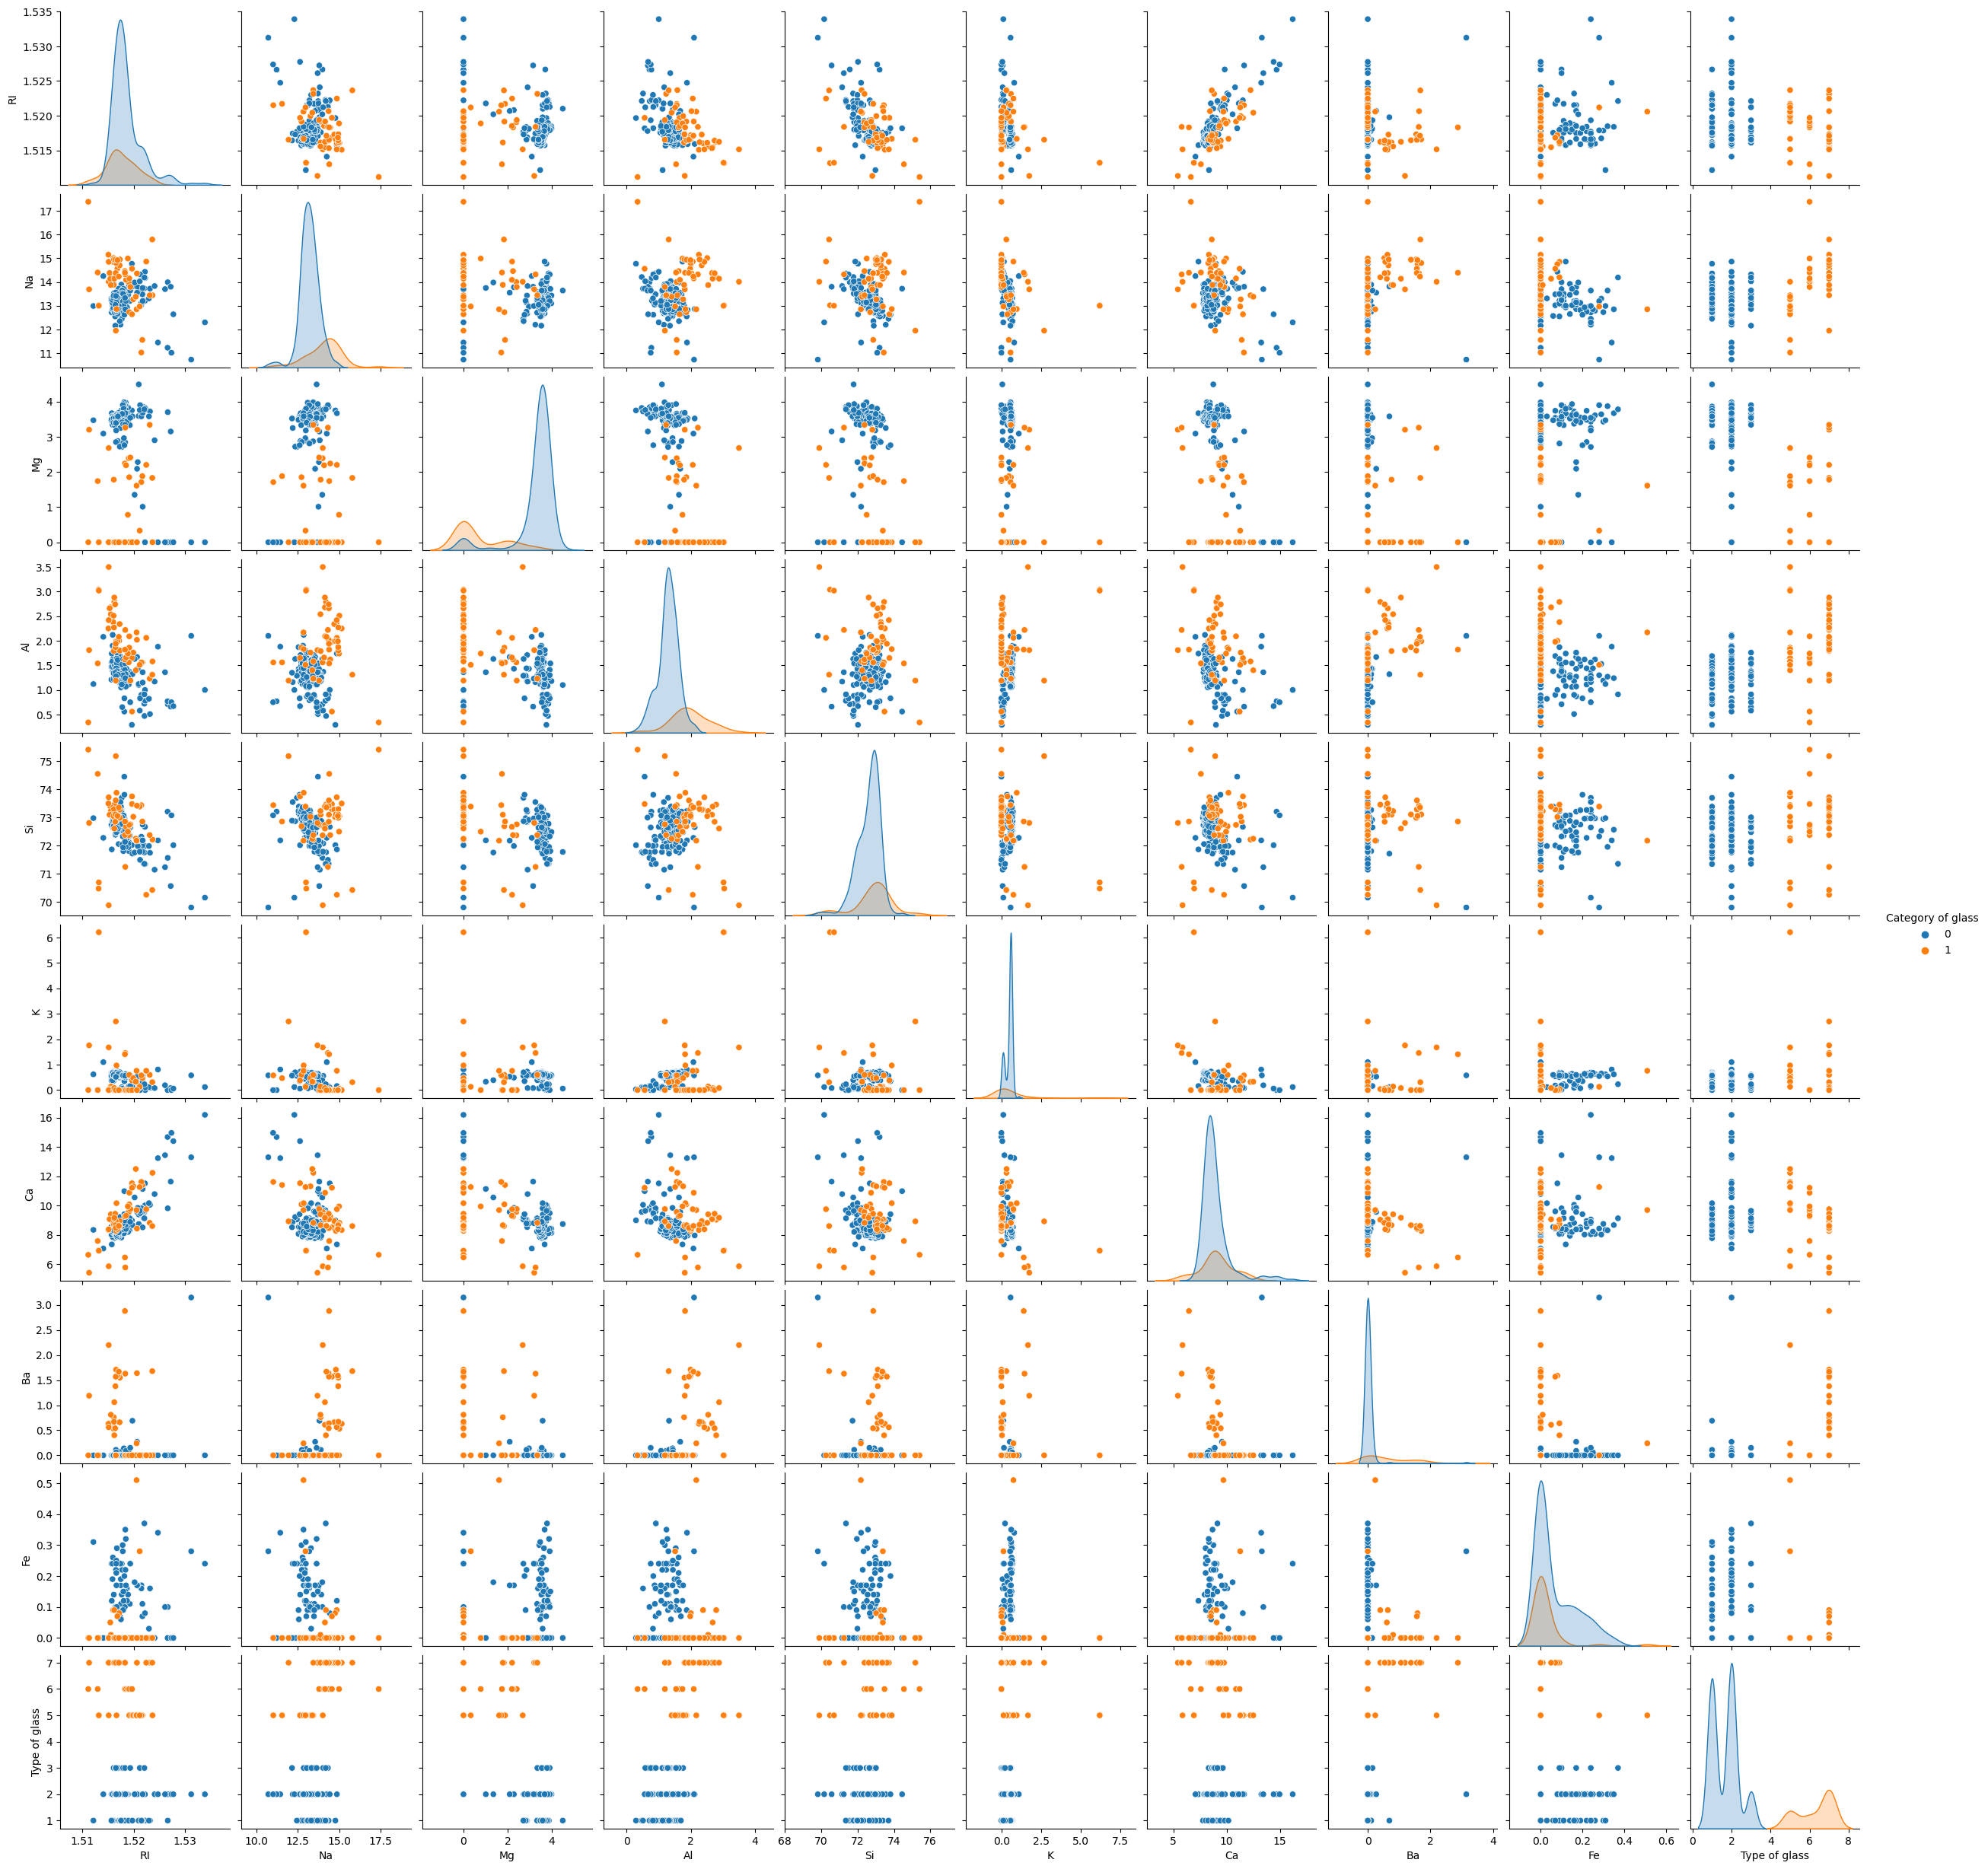

In [27]:
plt.figure(figsize = (5,10))
sns.pairplot(data=df, hue="Category of glass")

### Observations
- Due to binary classification ('Category of glass'), graph analysis is get more clear compare to multiple classification ('Type of Glass')
- No relation between noticed between target variable and features.
- Having multicorrelation between features, let's check heat map to have more clarity.
- Also, noticed pair plot with both target variables ('Types of Glass' and 'Category of glass') showing same kind of plot, so we can plan to drop one of the target variable.

In [28]:
corr = df.corr()
corr

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass,Category of glass
RI,1.000000,-0.198802,-0.127526,-0.400973,-0.539000,-0.287645,0.811183,0.001679,0.147083,-0.160140,-0.131638
Na,-0.198802,1.000000,-0.278420,0.167735,-0.064885,-0.264158,-0.278194,0.329080,-0.239374,0.508837,0.456296
Mg,-0.127526,-0.278420,1.000000,-0.479575,-0.162437,0.007617,-0.446197,-0.491818,0.085426,-0.744195,-0.757881
Al,-0.400973,0.167735,-0.479575,1.000000,-0.016195,0.323683,-0.258068,0.480642,-0.080583,0.597432,0.586513
Si,-0.539000,-0.064885,-0.162437,-0.016195,1.000000,-0.197281,-0.207145,-0.104389,-0.097717,0.147725,0.145630
K,-0.287645,-0.264158,0.007617,0.323683,-0.197281,1.000000,-0.317032,-0.043653,-0.009372,-0.012455,0.052294
Ca,0.811183,-0.278194,-0.446197,-0.258068,-0.207145,-0.317032,1.000000,-0.112208,0.126314,0.002677,0.041853
Ba,0.001679,0.329080,-0.491818,0.480642,-0.104389,-0.043653,-0.112208,1.000000,-0.059729,0.574896,0.523014
Fe,0.147083,-0.239374,0.085426,-0.080583,-0.097717,-0.009372,0.126314,-0.059729,1.000000,-0.191090,-0.196747
Type of glass,-0.160140,0.508837,-0.744195,0.597432,0.147725,-0.012455,0.002677,0.574896,-0.191090,1.000000,0.941735


- Will do the graphical presentation with heatmap to have more clarity on the analysis

<AxesSubplot:>

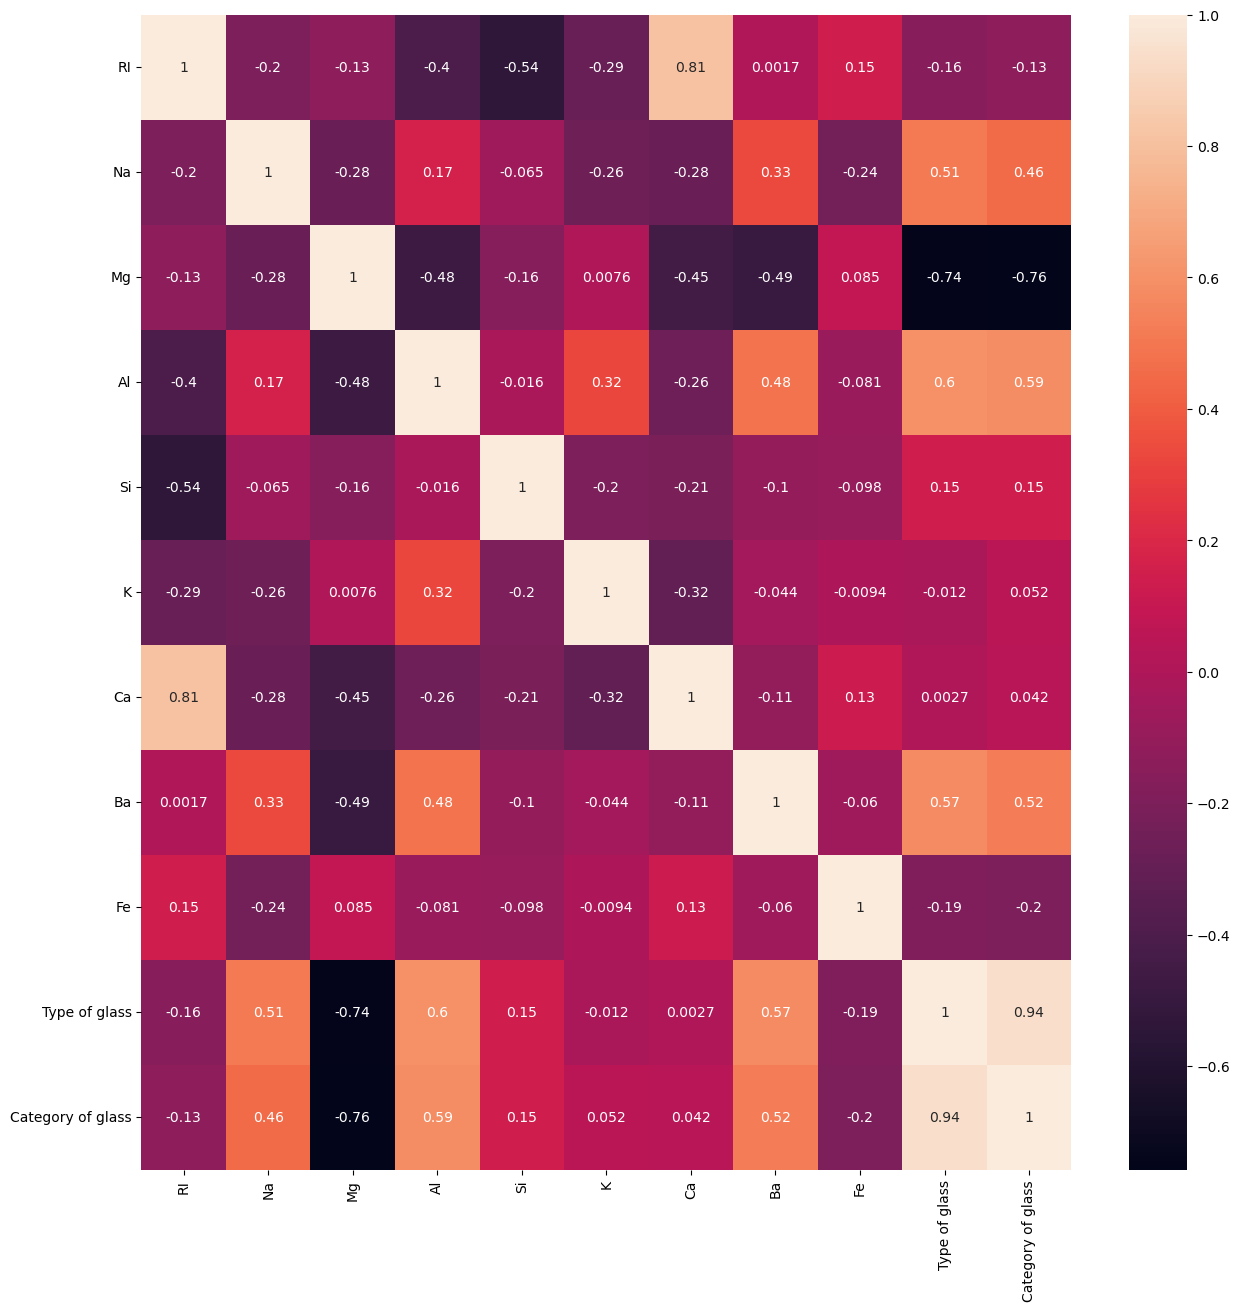

In [29]:
plt.figure(figsize = (15,15))
sns.heatmap(data=corr, annot=True)

### Observations
- Following features (Na, Al, Ba) having +ve moderate corrleation with both target variables ('Type of glass' and 'Category of glass')
- Following features (Mg) having strong -ve correlation with target variable ('Type of glass' and 'Category of glass')
- Strong correlation between both the variables.
- +ve Multicorrelation found between following features (RI and Ca), other having less +ve multicorrelations
- -ve Multicorrelation found between following features (RI and Si), other having less -ve multicorrelations
- It seems both target variables are similarly coorelating with the fetaures, hence one of them can be dropped.


In [30]:
df = df.drop('Type of glass', axis=1)
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Category of glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,0
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,1
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,1
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,1
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,1


In [31]:
df.skew()

RI                   1.648017
Na                   0.465699
Mg                  -1.146096
Al                   0.938402
Si                  -0.744646
K                    6.545429
Ca                   2.050752
Ba                   3.406749
Fe                   1.747173
Category of glass    1.229860
dtype: float64

### Observations
- Right skewdness in following columns (RI, Al, K, Ca, Ba, Fe, and Type of glass). Out of which Type of glass is the target variable.
- Negative skewdness in following columns (Mg and Si)

In [32]:
## removing skewness
from scipy.stats import boxcox
for i in x1.columns:
    if df[i].skew() > 0.5 or df[i].skew() < -0.5:
        df[i] = df[i] + 1
        df[i], _ = boxcox(df[i])
df.skew()

RI                   0.000000
Na                   0.465699
Mg                  -0.885988
Al                  -0.002881
Si                   0.133907
K                   -0.074668
Ca                  -0.210627
Ba                   1.817526
Fe                   0.852473
Category of glass    1.229860
dtype: float64

### Observations:
- Can see most of the skewness has been removed.
- However, couple of features like (Mg) still having negative skewness and features like (Ba and Fe) having postive skewness

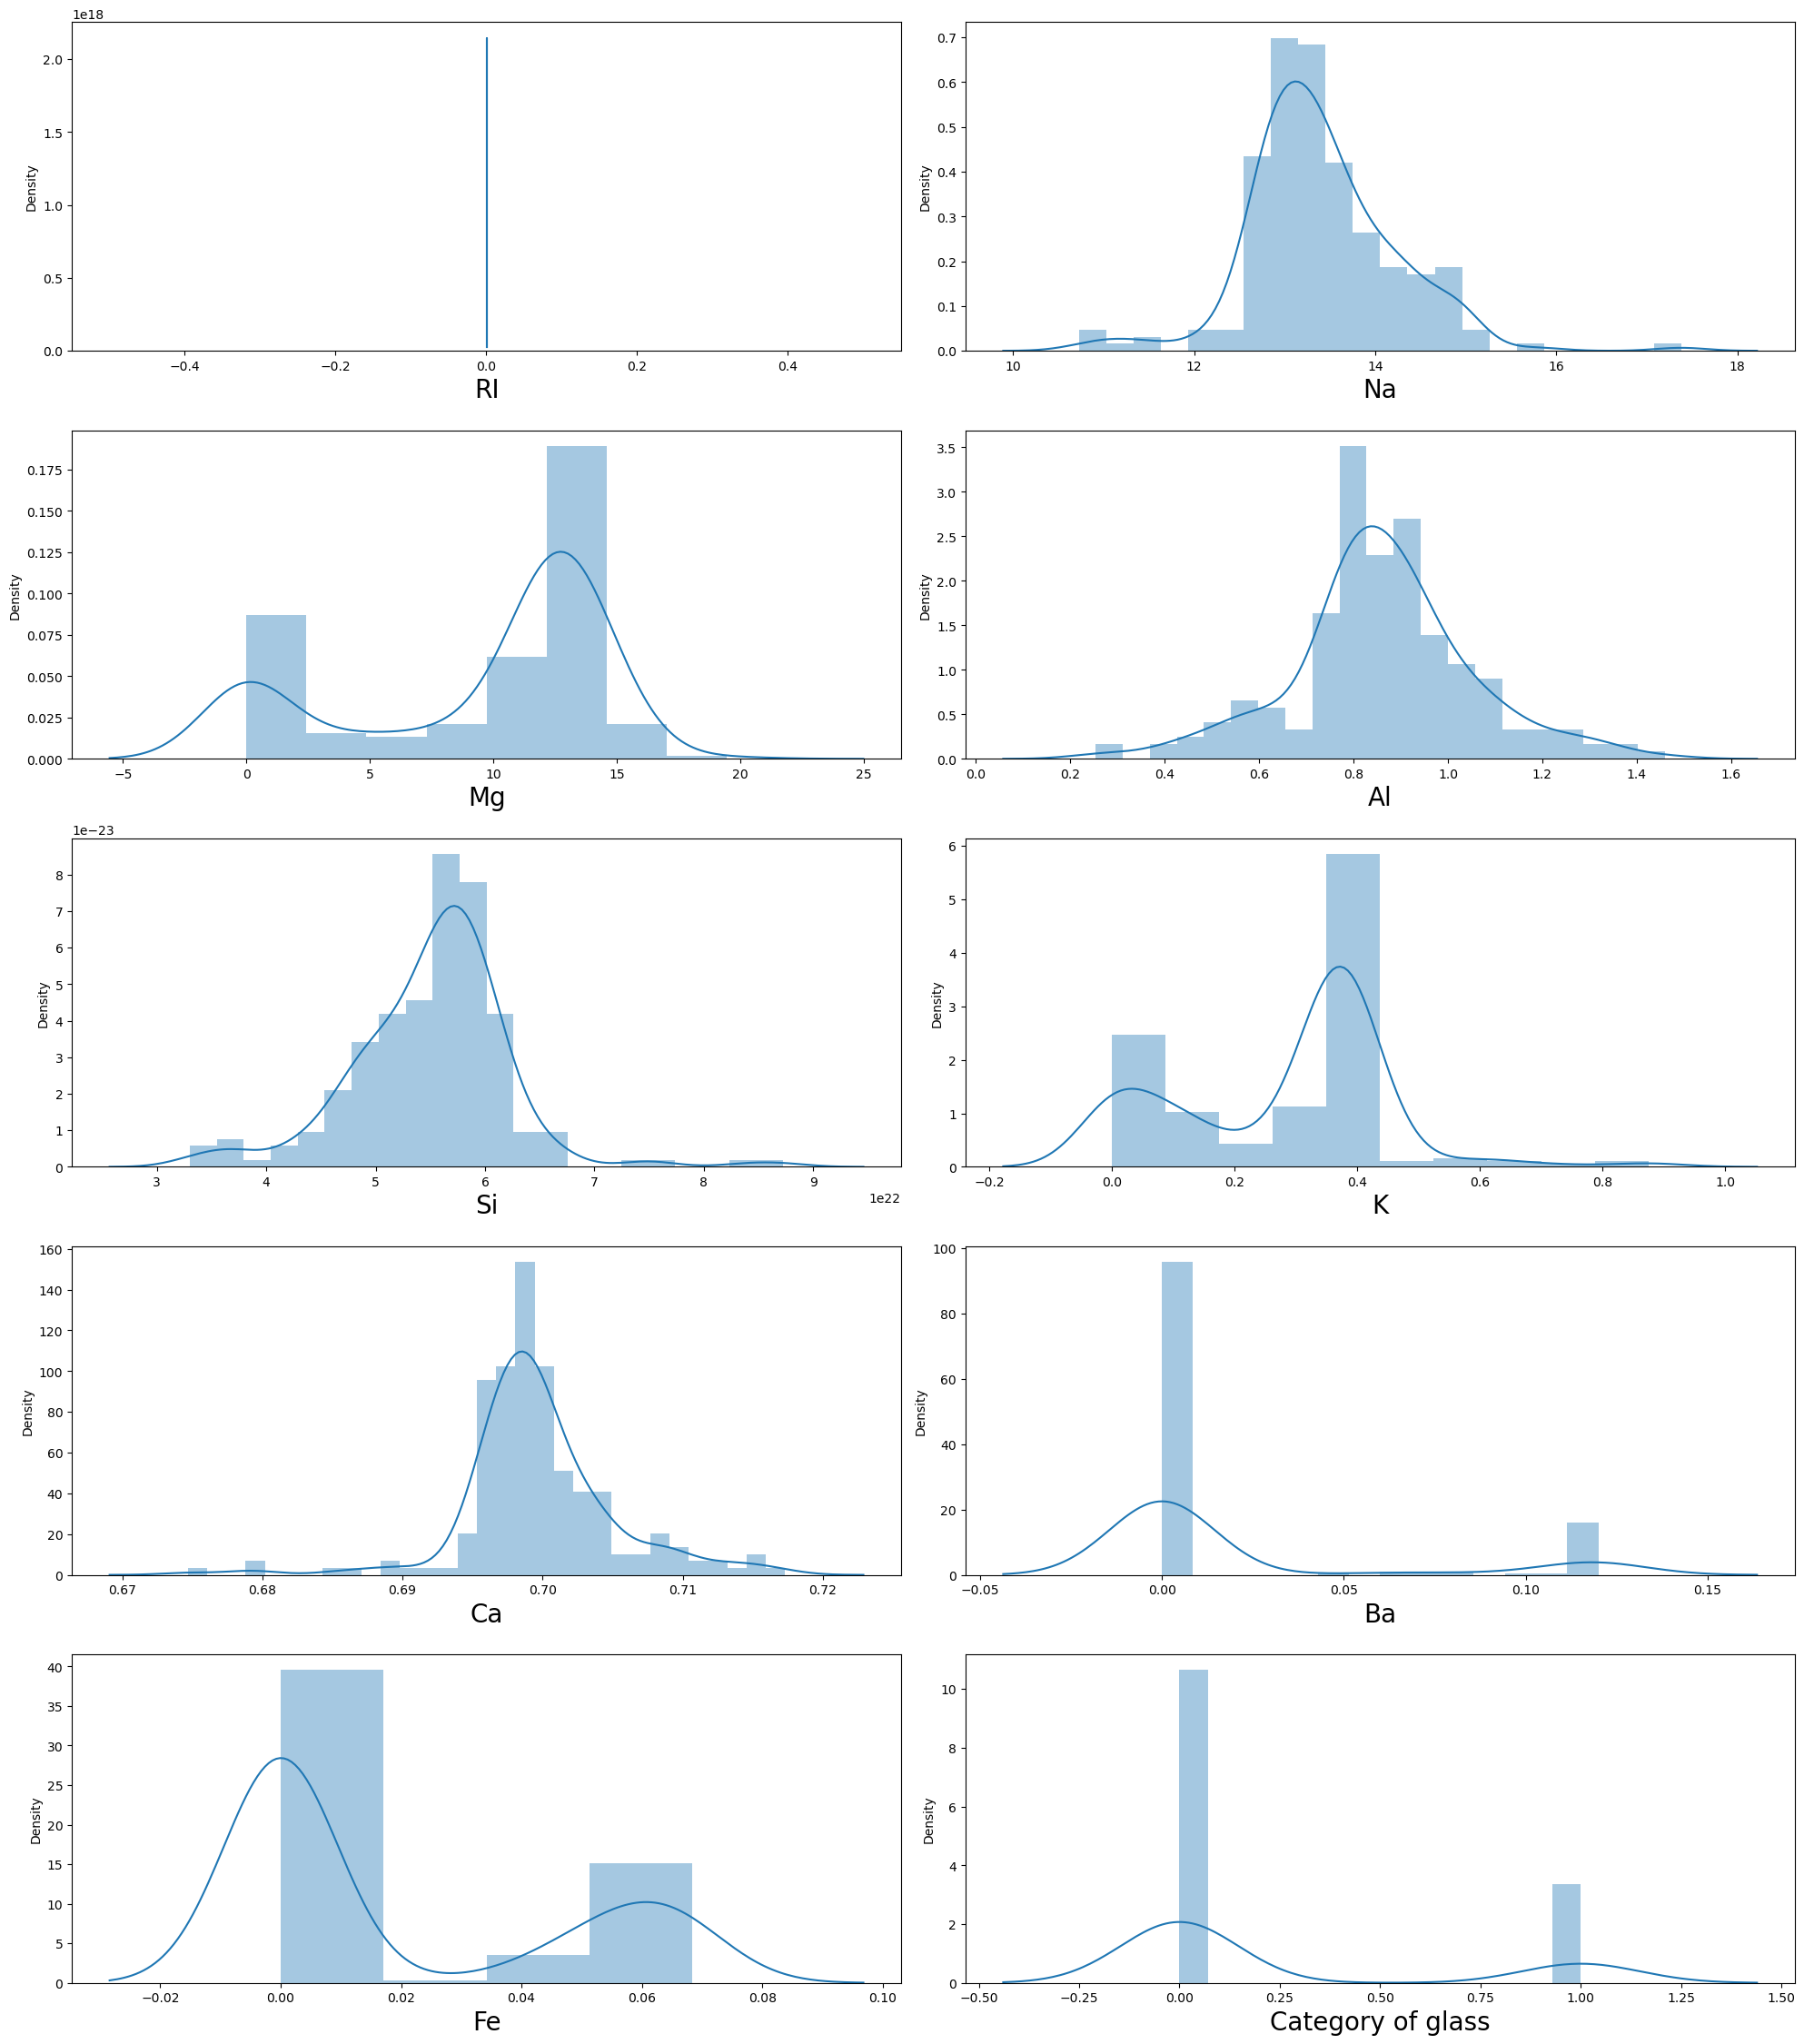

In [33]:
## Recheck the distribution of data, after resolving skewness concern
plotnumber = 1
plt.figure(figsize = (20, 40))
for i in df.columns:
    if plotnumber <=11:
        plt.subplot(9, 2, plotnumber)
        sns.distplot(df[i])
        plt.xlabel(i, fontsize = 20)
    plotnumber+=1  
plt.tight_layout()  

### Observations
- Confirmed all features showing almost normal distribution.

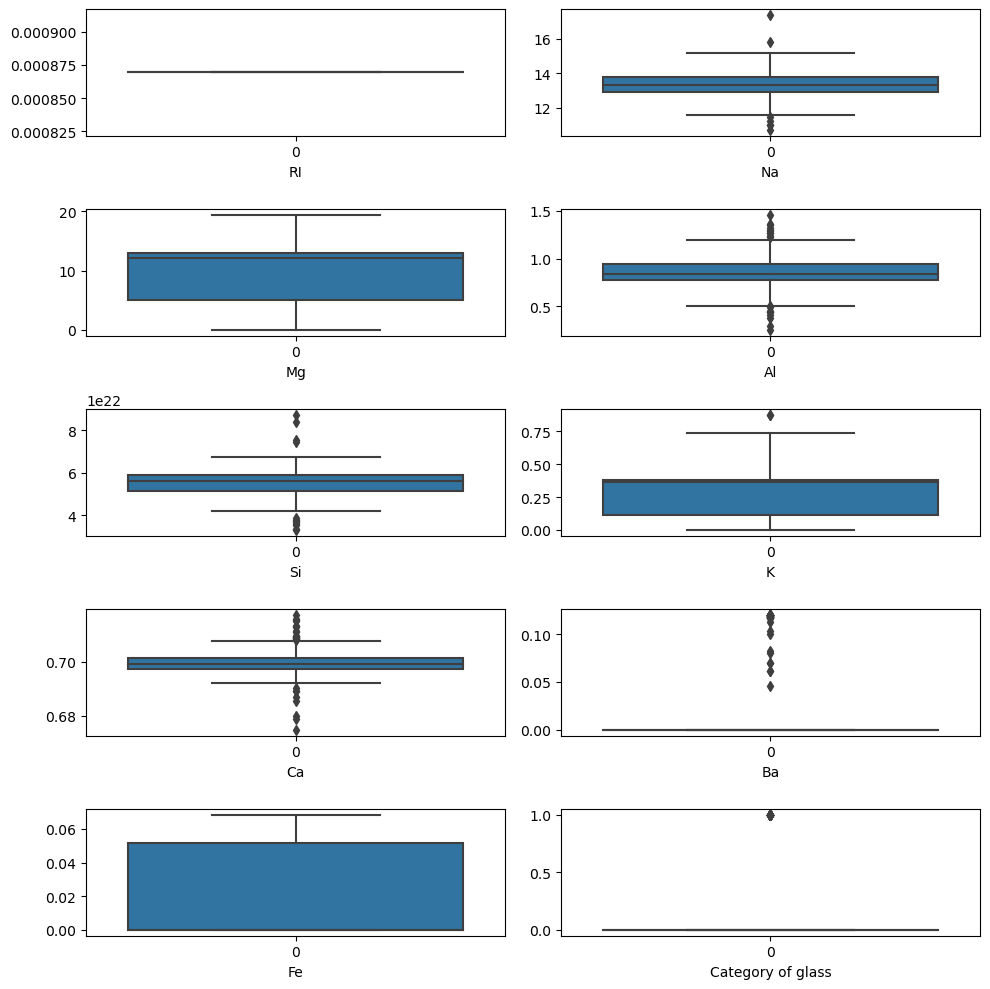

In [34]:
## Check outliers with boxplot
plt.figure(figsize = (10, 10))
number = 1
for col in df.columns:
    if number <= 10:
        plt.subplot(5, 2, number)
        sns.boxplot(data = df[col], orient = 'v')
        plt.xlabel(col)        
    number+=1
plt.tight_layout()

### Observations:
- Can see outliers in following columns - NA, Al, Si, K, Ca, Ba, and Category of glass. Out of which Category of glass is target variable. However, other features outliers will be removed. 

In [35]:
### Removing outliers with z score
outliers_columns = df[['Na', 'Al', 'Si', 'K', 'Ca', 'Ba']]
z = np.abs(zscore(outliers_columns))
outlier_mask = (z < 3).all(axis=1)
df1 = df[outlier_mask]
old_data = df.shape[0]
new_data = df1.shape[0]
loss_data = ((old_data - new_data) / old_data) * 100
print('Old data =', old_data)
print('New data = ', new_data)
print('Loss data in percentage = ', loss_data)

Old data = 213
New data =  203
Loss data in percentage =  4.694835680751173


In [36]:
### Removing outliers with IQR score
outliers_columns = df[['Na', 'Al', 'Si', 'K', 'Ca', 'Ba']]
q1 = outliers_columns.quantile(0.25)
q3 = outliers_columns.quantile(0.75) 
iqr = q3 - q1
lower_bound = q1 - (2 * iqr)
upper_bound = q3 + (2 * iqr)
outliers = ((outliers_columns < lower_bound) | (outliers_columns > upper_bound).any(axis=1))
df2 = df[~outliers]
old_data = df.shape[0]
new_data = df2.shape[0]
loss_data = ((old_data - new_data) / old_data) * 100
print('Old data =', old_data)
print('New data = ', new_data)
print('Loss data in percentage = ', loss_data)

Old data = 213
New data =  213
Loss data in percentage =  0.0


### Observations
- Z score shown almost 5% dataloss (in acceptable range) and IQR score shown 0 % data loss

In [37]:
df = df1
df.shape

(203, 10)

In [38]:
x = df.drop(columns = ['Category of glass'])
y = df['Category of glass']

### Features Scaling and using Standard Scalrization

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x1 = pd.DataFrame(x_scaled, columns = x.columns)
x1

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,-2.168404e-19,0.325640,1.872100,-0.731112,-1.453249,-1.377924,-0.084691,-0.438193,-0.691528
1,-2.168404e-19,0.662773,0.641230,-0.071491,0.001244,0.366662,-1.165057,-0.438193,-0.691528
2,-2.168404e-19,0.177302,0.579914,0.342282,0.439416,0.080628,-1.231497,-0.438193,-0.691528
3,-2.168404e-19,-0.254228,0.753673,-0.241346,-0.194941,0.620256,-0.675919,-0.438193,-0.691528
4,-2.168404e-19,-0.173316,0.665987,-0.366012,0.595366,0.566418,-0.858165,-0.438193,-0.691528
...,...,...,...,...,...,...,...,...,...
198,-2.168404e-19,0.999906,-1.824695,2.703417,-0.194941,-1.264467,0.341939,2.485828,-0.691528
199,-2.168404e-19,2.051761,-1.824695,1.256097,0.560517,-1.745198,-0.466273,2.491872,-0.691528
200,-2.168404e-19,1.296583,-1.824695,1.311833,1.205028,-1.745198,-0.420967,2.492027,-0.691528
201,-2.168404e-19,1.323554,-1.824695,1.161898,1.560284,-1.745198,-0.376113,2.491802,-0.691528


In [40]:
x1

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,-2.168404e-19,0.325640,1.872100,-0.731112,-1.453249,-1.377924,-0.084691,-0.438193,-0.691528
1,-2.168404e-19,0.662773,0.641230,-0.071491,0.001244,0.366662,-1.165057,-0.438193,-0.691528
2,-2.168404e-19,0.177302,0.579914,0.342282,0.439416,0.080628,-1.231497,-0.438193,-0.691528
3,-2.168404e-19,-0.254228,0.753673,-0.241346,-0.194941,0.620256,-0.675919,-0.438193,-0.691528
4,-2.168404e-19,-0.173316,0.665987,-0.366012,0.595366,0.566418,-0.858165,-0.438193,-0.691528
...,...,...,...,...,...,...,...,...,...
198,-2.168404e-19,0.999906,-1.824695,2.703417,-0.194941,-1.264467,0.341939,2.485828,-0.691528
199,-2.168404e-19,2.051761,-1.824695,1.256097,0.560517,-1.745198,-0.466273,2.491872,-0.691528
200,-2.168404e-19,1.296583,-1.824695,1.311833,1.205028,-1.745198,-0.420967,2.492027,-0.691528
201,-2.168404e-19,1.323554,-1.824695,1.161898,1.560284,-1.745198,-0.376113,2.491802,-0.691528


In [41]:
x = x1

In [42]:
## Checking Multicollinearity with VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
VIF_func = variance_inflation_factor
vif = pd.DataFrame()
vif['Vif'] = [VIF_func(x.values,i) for i in range(x.shape[1])]
vif['Features'] = x.columns
vif

,Vif,Features
0,1.000000,RI
1,5.568311,Na
2,10.260020,Mg
3,2.956535,Al
4,3.674077,Si
5,3.906323,K
6,9.545805,Ca
7,2.943542,Ba
8,1.072317,Fe


- Mg is showing high multicollinearity, so same can be dropped

In [43]:
x.drop('Mg', axis=1, inplace=True)
x

,RI,Na,Al,Si,K,Ca,Ba,Fe
0,-2.168404e-19,0.325640,-0.731112,-1.453249,-1.377924,-0.084691,-0.438193,-0.691528
1,-2.168404e-19,0.662773,-0.071491,0.001244,0.366662,-1.165057,-0.438193,-0.691528
2,-2.168404e-19,0.177302,0.342282,0.439416,0.080628,-1.231497,-0.438193,-0.691528
3,-2.168404e-19,-0.254228,-0.241346,-0.194941,0.620256,-0.675919,-0.438193,-0.691528
4,-2.168404e-19,-0.173316,-0.366012,0.595366,0.566418,-0.858165,-0.438193,-0.691528
...,...,...,...,...,...,...,...,...
198,-2.168404e-19,0.999906,2.703417,-0.194941,-1.264467,0.341939,2.485828,-0.691528
199,-2.168404e-19,2.051761,1.256097,0.560517,-1.745198,-0.466273,2.491872,-0.691528
200,-2.168404e-19,1.296583,1.311833,1.205028,-1.745198,-0.420967,2.492027,-0.691528
201,-2.168404e-19,1.323554,1.161898,1.560284,-1.745198,-0.376113,2.491802,-0.691528


In [44]:
## ReChecking Multicollinearity with VIF
VIF_func = variance_inflation_factor
vif = pd.DataFrame()
vif['Vif'] = [VIF_func(x.values,i) for i in range(x.shape[1])]
vif['Features'] = x.columns
vif

,Vif,Features
0,1.000000,RI
1,3.293047,Na
2,1.802064,Al
3,1.645746,Si
4,3.364512,K
5,2.101192,Ca
6,2.314904,Ba
7,1.055932,Fe


### Observation:
- Confirmed no strong correlation between features

In [45]:
y.value_counts()

0    159
1     44
Name: Category of glass, dtype: int64

### Observation:
- Can see data set imbalance with try to resolve by SMOTE

In [46]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x1, y1 = sm.fit_resample(x, y)

In [47]:
y.value_counts()

0    159
1     44
Name: Category of glass, dtype: int64

In [48]:
y1.value_counts()

0    159
1    159
Name: Category of glass, dtype: int64

### Modelling

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [50]:
### Creating train test split
x_train,x_test,y_train,y_test = train_test_split(x1, y1, test_size = 0.25, random_state = 300)

In [51]:
### Classsification Models
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score, auc
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [52]:
RFC = RandomForestClassifier()
ETC = ExtraTreesClassifier()
GBC = GradientBoostingClassifier()
ABC = AdaBoostClassifier()
BC = BaggingClassifier()
LR = LogisticRegression()
svc = SVC()
DTC = DecisionTreeClassifier()
KNN = KNeighborsClassifier()

In [53]:
def metric_score(model, x_train,x_test,y_train,y_test, train=True):
    if train:
        y_pred = model.predict(x_train)
        
        print(f"Model Name: {model_name}")
        print("\n---------------Train Result---------------")
        print(f"Accuracy Score: {accuracy_score(y_train, y_pred) * 100:.2f}%")
    elif train==False:
        pred = model.predict(x_test)
        
        print("\n---------------Test Result---------------")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")        
        print('\n \n Confusion Matrix \n', confusion_matrix(y_test, pred))
        print('\n \n Test Classification Report \n', classification_report(y_test, pred, digits=2))

In [54]:
models = [('RFC', RFC), ('ETC', ETC), ('GBC', ABC), ('BC', BC), ('LR', LR), ('svc', svc), ('DTC', DTC), ('KNN', KNN)]
for model_name, model in models:
    model.fit(x_train, y_train)    

In [55]:
for model_name, model in models:
    metric_score(model, x_train,x_test,y_train,y_test, train=True)
    metric_score(model, x_train,x_test,y_train,y_test, train=False)

Model Name: RFC

---------------Train Result---------------
Accuracy Score: 100.00%

---------------Test Result---------------
Accuracy Score: 95.00%

 
 Confusion Matrix 
 [[37  4]
 [ 0 39]]

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       1.00      0.90      0.95        41
           1       0.91      1.00      0.95        39

    accuracy                           0.95        80
   macro avg       0.95      0.95      0.95        80
weighted avg       0.95      0.95      0.95        80

Model Name: ETC

---------------Train Result---------------
Accuracy Score: 100.00%

---------------Test Result---------------
Accuracy Score: 95.00%

 
 Confusion Matrix 
 [[38  3]
 [ 1 38]]

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.97      0.93      0.95        41
           1       0.93      0.97      0.95        39

    accuracy                           0.95        80
   ma

### Cross Validation to check whether selected models are over fitting

In [56]:
from sklearn.model_selection import cross_val_score

In [57]:
for model_name, model in models:
    score = cross_val_score(model, x1, y1, cv=5)
    print(f"Model Name: {model_name}")
    print('Accuracy Score = ',accuracy_score(y_test, model.predict(x_test)) * 100)
    print('Cross validation score = ', score.mean()* 100)
    print('Difference between Accuracy and Cross Validation Score = ', accuracy_score(y_test, model.predict(x_test)) - score.mean())
    print('\n')

Model Name: RFC
Accuracy Score =  95.0
Cross validation score =  93.99801587301587
Difference between Accuracy and Cross Validation Score =  0.010019841269841234


Model Name: ETC
Accuracy Score =  95.0
Cross validation score =  93.99801587301587
Difference between Accuracy and Cross Validation Score =  0.010019841269841234


Model Name: GBC
Accuracy Score =  93.75
Cross validation score =  91.49801587301587
Difference between Accuracy and Cross Validation Score =  0.0225198412698413


Model Name: BC
Accuracy Score =  92.5
Cross validation score =  93.67063492063492
Difference between Accuracy and Cross Validation Score =  -0.011706349206349165


Model Name: LR
Accuracy Score =  91.25
Cross validation score =  94.63789682539682
Difference between Accuracy and Cross Validation Score =  -0.03387896825396819


Model Name: svc
Accuracy Score =  95.0
Cross validation score =  95.8829365079365
Difference between Accuracy and Cross Validation Score =  -0.008829365079365048


Model Name: DTC
A

### Conclusion:
- RFC and ETC both are the best model, as difference between accuracy score and cross validation score is least compares to others model.
- Will do hyper parameter tuning for both model to check which one is best.

### Hyper parameter tuning for RFC Model

In [60]:
## RFC
from sklearn.model_selection import GridSearchCV

In [58]:
param_grid = { 'n_estimators': [100, 150, 200],
               'max_depth': [None, 5, 10, 15],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'random_state': [42]            
             }

In [61]:
gridsearch = GridSearchCV(RFC, param_grid, cv=5)
gridsearch.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 150, 200],
                         'random_state': [42]})

In [62]:
gridsearch.best_score_

0.9705673758865249

In [63]:
gridsearch.best_params_

{'max_depth': None,
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 100,
 'random_state': 42}

In [65]:
Model_1 = RandomForestClassifier(max_depth = None, min_samples_leaf = 2, min_samples_split = 10, n_estimators = 100, random_state = 42)
Model_1.fit(x_train,y_train)

RandomForestClassifier(min_samples_leaf=2, min_samples_split=10,
                       random_state=42)

In [66]:
y_pred = Model_1.predict(x_train)
print("\n---------------Train Result---------------")
print(f"Accuracy Score: {accuracy_score(y_train, y_pred) * 100:.2f}%")
pred = Model_1.predict(x_test)
print("\n---------------Test Result---------------")
print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
print('\n \n Confusion Matrix \n', confusion_matrix(y_test, pred))
print('\n \n Test Classification Report \n', classification_report(y_test, pred, digits=2))


---------------Train Result---------------
Accuracy Score: 99.16%

---------------Test Result---------------
Accuracy Score: 93.75%

 
 Confusion Matrix 
 [[36  5]
 [ 0 39]]

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       1.00      0.88      0.94        41
           1       0.89      1.00      0.94        39

    accuracy                           0.94        80
   macro avg       0.94      0.94      0.94        80
weighted avg       0.94      0.94      0.94        80



## Hyper parameter tuning for ETC Model

In [67]:
## ETC
from sklearn.model_selection import GridSearchCV

In [68]:
param_grid = { 'n_estimators': [100, 150, 200],
               'max_depth': [None, 5, 10, 15],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'random_state': [100]            
             }

In [69]:
gridsearch = GridSearchCV(ETC, param_grid, cv=5)
gridsearch.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 150, 200],
                         'random_state': [100]})

In [70]:
gridsearch.best_score_

0.987322695035461

In [71]:
gridsearch.best_params_

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 200,
 'random_state': 100}

In [72]:
Model_2 = ExtraTreesClassifier(max_depth = None, min_samples_leaf = 1, min_samples_split = 5, n_estimators = 200, random_state = 100)
Model_2.fit(x_train,y_train)

ExtraTreesClassifier(min_samples_split=5, n_estimators=200, random_state=100)

In [73]:
y_pred1 = Model_2.predict(x_train)
print("\n---------------Train Result---------------")
print(f"Accuracy Score: {accuracy_score(y_train, y_pred1) * 100:.2f}%")
pred1 = Model_2.predict(x_test)
print("\n---------------Test Result---------------")
print(f"Accuracy Score: {accuracy_score(y_test, pred1) * 100:.2f}%")
print('\n \n Confusion Matrix \n', confusion_matrix(y_test, pred1))
print('\n \n Test Classification Report \n', classification_report(y_test, pred1, digits=2))


---------------Train Result---------------
Accuracy Score: 99.58%

---------------Test Result---------------
Accuracy Score: 93.75%

 
 Confusion Matrix 
 [[38  3]
 [ 2 37]]

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.95      0.93      0.94        41
           1       0.93      0.95      0.94        39

    accuracy                           0.94        80
   macro avg       0.94      0.94      0.94        80
weighted avg       0.94      0.94      0.94        80



## Observations:
- Both models accuracy score seems very close to each other.
- Let's check with roc_auc to find best model

In [74]:
### Plotting ROC and compare AUC for Model1
fpr, tpr, thresholds = roc_curve(y_test, pred)    

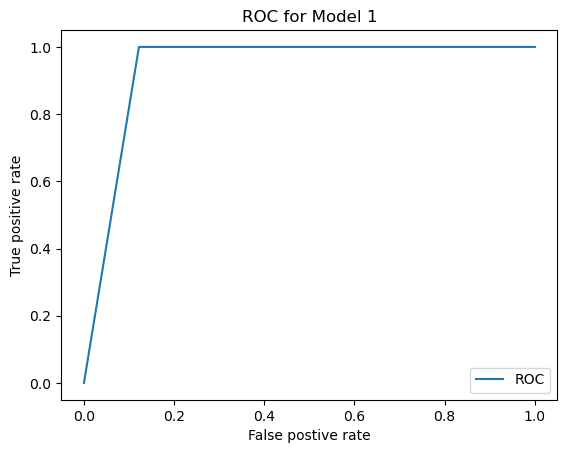

In [75]:
plt.plot(fpr, tpr, label = 'ROC')
plt.xlabel('False postive rate')
plt.ylabel('True positive rate')
plt.title('ROC for Model 1')
plt.legend()
plt.show()

In [76]:
## AUC score for Model 1
roc_auc_1 = auc(fpr, tpr)
roc_auc_1

0.9390243902439024

In [78]:
### Plotting ROC and compare AUC for Model2
fpr, tpr, thresholds = roc_curve(y_test, pred1)    

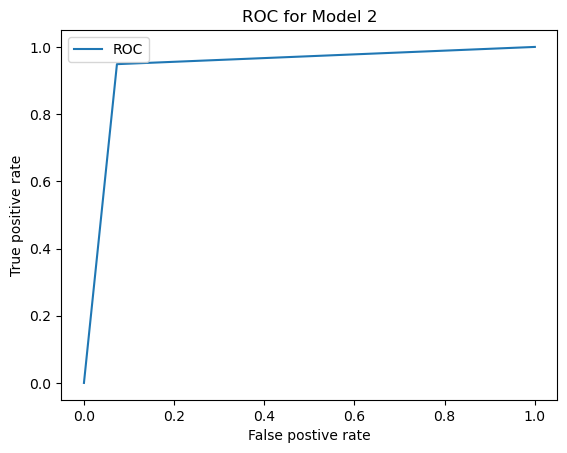

In [79]:
plt.plot(fpr, tpr, label = 'ROC')
plt.xlabel('False postive rate')
plt.ylabel('True positive rate')
plt.title('ROC for Model 2')
plt.legend()
plt.show()

In [80]:
## AUC score for Model 2
roc_auc_2 = auc(fpr, tpr)
roc_auc_2

0.9377736085053159

## Osbervations:
- Seems both roc_auc close to each other.
- However, considering highest auc score we can chosen Model 2 (ETC)

In [81]:
Final_model = Model_2

### Saving the final model

In [82]:
import pickle

In [83]:
pickle.dump(Final_model, open('Glass Identification','wb'))

In [84]:
## Do the predication
loaded_model = pickle.load(open('Glass Identification','rb'))
predicted = loaded_model.predict(x_test)
original = np.array(y_test)
df = pd.DataFrame()
df['Predicted'] = predicted
df['Original'] = original
df

,Predicted,Original
0,1,1
1,1,1
2,0,0
3,1,1
4,1,0
...,...,...
75,1,1
76,1,1
77,0,0
78,0,0


In [85]:
print(f"Accuracy Score: {accuracy_score(y_test, predicted) * 100:.2f}%")

Accuracy Score: 93.75%
